In [63]:
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import cv2

In [64]:
def load_image(image_path, size=None):
    target = cv2.imread(image_path, cv2.IMREAD_COLOR)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    if size:
        target = cv2.resize(src=target, dsize=size, interpolation=cv2.INTER_AREA)
    return target

In [65]:
def color_balance(image, r, g, b):
    image2 = np.zeros(image.shape)
    image2[:,:,0] = ((1 + 2*r)*image[:,:,0] + (1 - r)*image[:,:,1] + (1 - r)*image[:,:,2])/3
    image2[:,:,1] = ((1 + 2*g)*image[:,:,1] + (1 - g)*image[:,:,0] + (1 - g)*image[:,:,2])/3
    image2[:,:,2] = ((1 + 2*b)*image[:,:,2] + (1 - b)*image[:,:,0] + (1 - b)*image[:,:,1])/3
    image2 = image2/255
    return image2

In [66]:
#image = load_image('./arbol.png', size=(64,64))
image = load_image('./TestFiles/Wb_girl_neutral.jpg')
image = np.array(image).astype(int)
image.shape

(1707, 2560, 3)

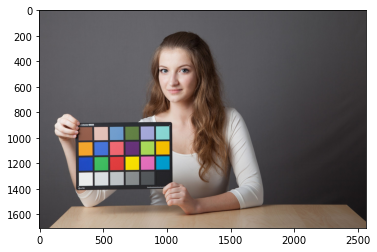

In [67]:
plt.figure()
plt.imshow(color_balance(image, 1, 1, 1))
plt.show()

In [68]:
img = cv2.imread('./TestFiles/Wb_girl_neutral.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Number of contours detected: 8712


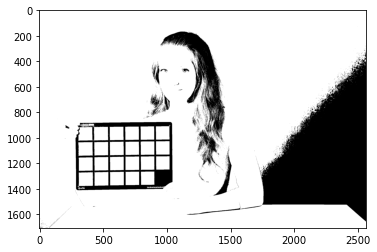

In [69]:
ret,thresh = cv2.threshold(gray,58,59,0)
#contours,hierarchy = cv2.findContours(thresh, 1, 2)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:", len(contours))
plt.imshow(thresh, cmap='gray')

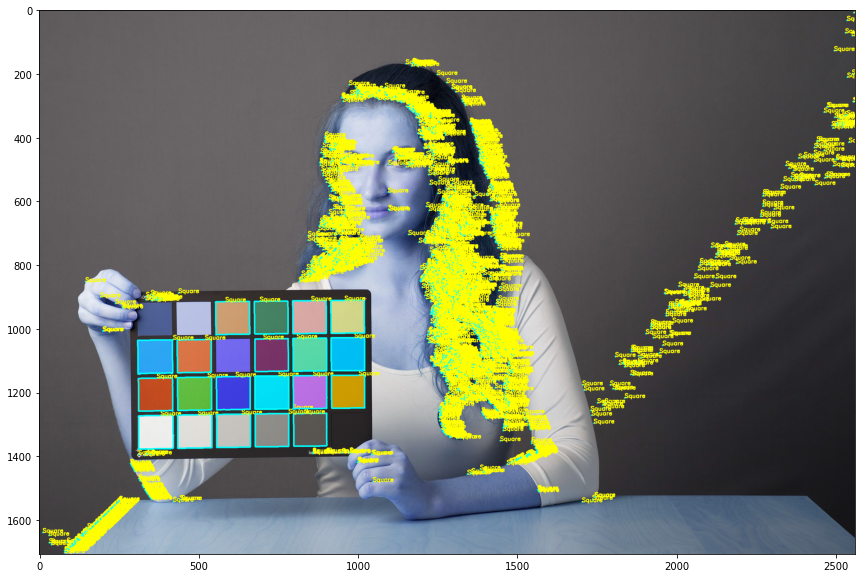

In [70]:
for cnt in contours:
   x1,y1 = cnt[0][0]
   approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
   if len(approx) == 4:
      x, y, w, h = cv2.boundingRect(cnt)
      ratio = float(w)/h
      if ratio >= 0.9 and ratio <= 1.1:
         img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
         cv2.putText(img, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      #else:
         #cv2.putText(img, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
         #img = cv2.drawContours(img, [cnt], -1, (0,255,0), 3)

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()